In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  matplotlib.ticker import PercentFormatter
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('pre_processed_data.csv')

In [3]:
le=LabelEncoder()

In [4]:
target=data['Harm_vs_benifits']
features=data.drop('Harm_vs_benifits',axis=1).apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=16)

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

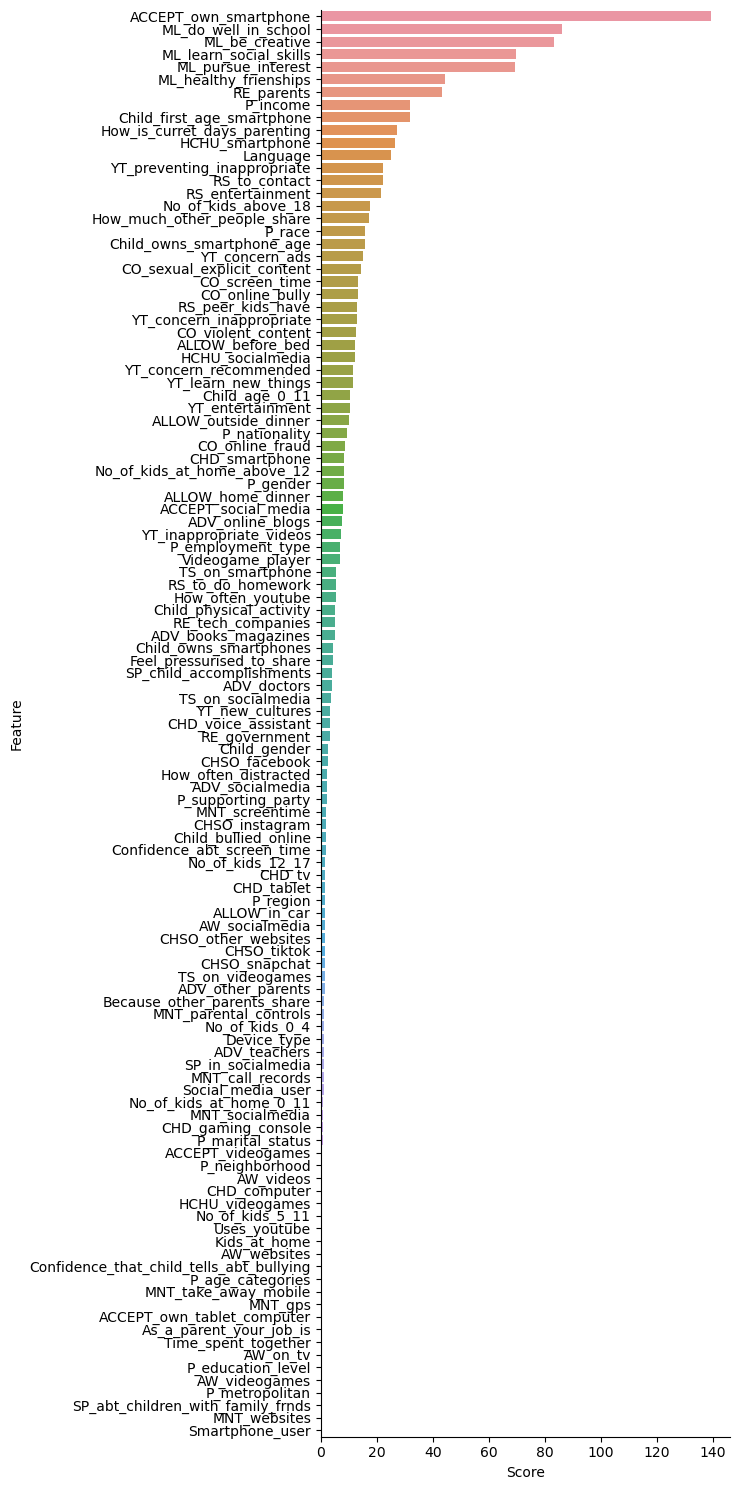

In [5]:
# Let us use chi2 test of independence
chi= SelectKBest(score_func=chi2,k='all')
chi.fit(X_train,y_train)
df=pd.DataFrame()
df['Score']=chi.scores_
df['Feature']=features.columns
df.sort_values(by='Score',inplace=True,ascending=False)
sns.catplot(kind='bar',data=df,x='Score',y='Feature',aspect=0.5,height=15)

In [6]:
df

,Score,Feature
31,139.257227,ACCEPT_own_smartphone
27,86.225663,ML_do_well_in_school
25,83.445116,ML_be_creative
24,69.581361,ML_learn_social_skills
26,69.446826,ML_pursue_interest
...,...,...
77,0.135721,AW_videogames
101,0.114210,P_metropolitan
19,0.040163,SP_abt_children_with_family_frnds
78,0.021396,MNT_websites


C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

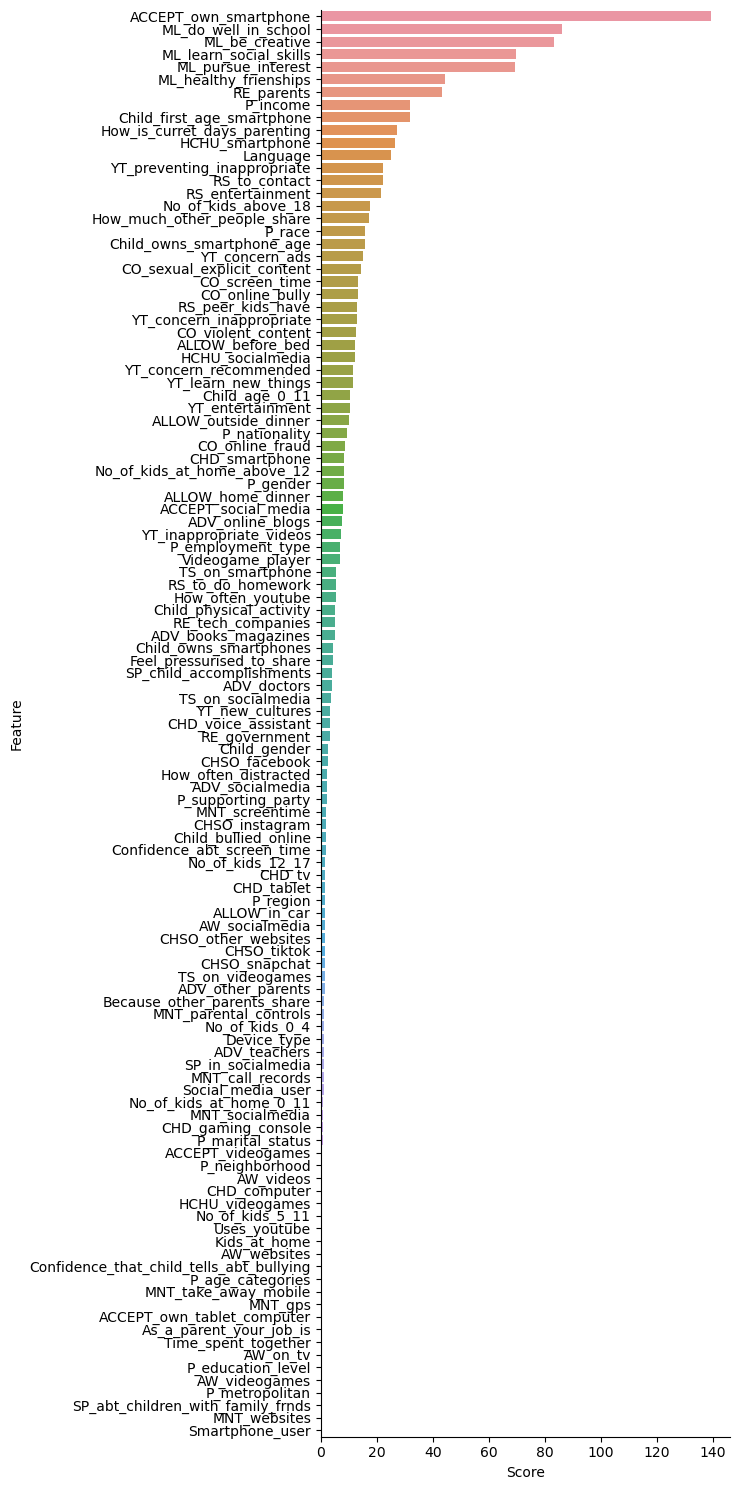

In [7]:
# USing f_classif for selecting best features
mti= SelectKBest(score_func=mutual_info_classif,k='all')
mti.fit(X_train,y_train)
df1=pd.DataFrame()
df1['Score']=chi.scores_
df1['Feature']=features.columns
df1.sort_values(by='Score',inplace=True,ascending=False)
sns.catplot(kind='bar',data=df1,x='Score',y='Feature',aspect=0.5,height=15)

In [8]:
df1

,Score,Feature
31,139.257227,ACCEPT_own_smartphone
27,86.225663,ML_do_well_in_school
25,83.445116,ML_be_creative
24,69.581361,ML_learn_social_skills
26,69.446826,ML_pursue_interest
...,...,...
77,0.135721,AW_videogames
101,0.114210,P_metropolitan
19,0.040163,SP_abt_children_with_family_frnds
78,0.021396,MNT_websites


In [9]:
# Let us pick only top 30% of columns
val=len(df)
significant_columns=df.nlargest(int(0.4*val),columns='Score')['Feature'].to_list()

In [10]:
significant_columns

['ACCEPT_own_smartphone',
 'ML_do_well_in_school',
 'ML_be_creative',
 'ML_learn_social_skills',
 'ML_pursue_interest',
 'ML_healthy_frienships',
 'RE_parents',
 'P_income',
 'Child_first_age_smartphone',
 'How_is_curret_days_parenting',
 'HCHU_smartphone',
 'Language',
 'YT_preventing_inappropriate',
 'RS_to_contact',
 'RS_entertainment',
 'No_of_kids_above_18',
 'How_much_other_people_share',
 'P_race',
 'Child_owns_smartphone_age',
 'YT_concern_ads',
 'CO_sexual_explicit_content',
 'CO_screen_time',
 'CO_online_bully',
 'RS_peer_kids_have',
 'YT_concern_inappropriate',
 'CO_violent_content',
 'ALLOW_before_bed',
 'HCHU_socialmedia',
 'YT_concern_recommended',
 'YT_learn_new_things',
 'Child_age_0_11',
 'YT_entertainment',
 'ALLOW_outside_dinner',
 'P_nationality',
 'CO_online_fraud',
 'CHD_smartphone',
 'No_of_kids_at_home_above_12',
 'P_gender',
 'ALLOW_home_dinner',
 'ACCEPT_social_media',
 'ADV_online_blogs',
 'YT_inappropriate_videos',
 'P_employment_type',
 'Videogame_player',


In [11]:
target_new=le.fit_transform(data['Harm_vs_benifits'])
features_new=data[significant_columns].apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(features_new,target_new, test_size=0.2, random_state=179,stratify=target_new)

In [12]:
mod=LogisticRegression(C=1,max_iter=1000000)
mod.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000000)

In [13]:
pred=mod.predict(X_test)

In [14]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.7582417582417582

In [15]:
rand=RandomForestClassifier(max_depth=20,min_samples_leaf=0.001,n_estimators=120,random_state=156)
rand.fit(X_train,y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=0.001, n_estimators=120,
                       random_state=156)

In [16]:
pred_rand=rand.predict(X_test)

accuracy_rand=accuracy_score(y_test,pred_rand)
accuracy_rand

0.7815934065934066

Let us use onehot encoding of the features

In [17]:
onehot=OneHotEncoder()
features_onehot=onehot.fit_transform(data[significant_columns])
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(features_onehot,target_new, test_size=0.2, random_state=179,stratify=target_new)

In [18]:
mod_onehot=LogisticRegression(C=1,max_iter=1000000)
mod.fit(X_train_one,y_train_one)

pred=mod.predict(X_test_one)

accuracy=accuracy_score(y_test_one,pred)
accuracy

0.7692307692307693

In [19]:
rand=RandomForestClassifier(max_depth=20,min_samples_leaf=0.001,n_estimators=120,random_state=156)
rand.fit(X_train_one,y_train_one)


pred_rand=rand.predict(X_test_one)

accuracy_rand=accuracy_score(y_test_one,pred_rand)
accuracy_rand

0.771978021978022

Change of encoding doesnt change the accuracy may be the accuracy can be improved by dealing with class imbalance


To deal with imbalance we use resampling which involves UnderSampling (removing random values of the majority class) and OverSampling (Adding more examples for minority class). 
1) Each of the method has its share of disadvantages, under sampling removes information contained where as oversampling adds redundant information.
2) SMOTE (Synthetic Minority Oversampling Technique): 
It works in a way that randomly pick a minority point and perform KNN to find the nearest neighbors. Choose a neighbor and add a synthetic point between the line joining the point under consideration and the neighbor

In [20]:
data['Harm_vs_benifits'].value_counts()

Harm_vs_benifits
The potential harm that most children may face from having access to a smartphone outweighs the potential benefits    2659
The potential benefits that most children may get from having access to a smartphone outweigh the potential harm       930
Refused                                                                                                                 51
Name: count, dtype: int64

As the 2nd (The potential benefits that most children may get from having access to a smartphone outweigh the potential harm) value of the Harm_vs_benifits column is nearly the 1/3 of the 1st value. Let us try to perform weighted sampling such that 2nd value gets more weightage than the others

In [21]:
condition= data['Harm_vs_benifits']=='The potential benefits that most children may get from having access to a smartphone outweigh the potential harm'

data['weight_for_sampling']=np.where(condition,2.8,1)

new_df=data.sample(frac=2,weights='weight_for_sampling',replace=True)

In [22]:
new_df['Harm_vs_benifits'].value_counts()

Harm_vs_benifits
The potential harm that most children may face from having access to a smartphone outweighs the potential benefits    3717
The potential benefits that most children may get from having access to a smartphone outweigh the potential harm      3490
Refused                                                                                                                 73
Name: count, dtype: int64

In [23]:
new_df=new_df.reset_index(drop=True)

In [24]:
onehot=OneHotEncoder()
features_onehot=onehot.fit_transform(new_df[significant_columns])
targets_updated=le.fit_transform(new_df['Harm_vs_benifits'])
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(features_onehot,targets_updated, test_size=0.2, random_state=179,stratify=targets_updated)

In [25]:
rand=RandomForestClassifier(max_depth=20,min_samples_leaf=0.001,n_estimators=120,random_state=156)
rand.fit(X_train_one,y_train_one)


pred_rand=rand.predict(X_test_one)

accuracy_rand=accuracy_score(y_test_one,pred_rand)
accuracy_rand

0.8907967032967034